In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
train_df=pd.read_csv('coronaTrain.csv')
test_df=pd.read_csv('coronaTest.csv')

In [3]:
train_df.head(5)


Index            0            1            2            3            4  \
0      0  5280.167730  3837.700942  1681.942638  5843.046523  -232.842418   
1      1 -3223.055169 -1115.166494 -1336.564180  1286.738497  3403.835973   
2      2  8007.313938  5491.331210  3663.342202   593.011444 -2989.930294   
3      3  4533.969789  1859.902341 -2106.670412 -2938.184416 -1435.850576   
4      4   921.522640 -1200.312956   -14.678130  1779.298398 -3506.129638   

             5            6            7            8  ...        991  \
0   818.394788  3030.753422  2277.569997   573.577558  ... -11.788928   
1  1036.306212  -401.889306   323.775792  1494.498731  ... -86.010820   
2 -1650.875980  1118.997993  2391.424050  2575.013614  ...  20.228240   
3 -1167.242348  -476.518632  -215.481546 -1838.518402  ...  -0.340331   
4   855.198666  -943.207950 -1956.808320   320.996880  ...  20.692532   

         992         993        994        995        996        997  \
0  -4.290970    2.594959 -43.219612  -4.240717  31.517564 -41.453802   
1 -31.261799  103.364060  46.960054 -62.536342 -92.178920 -39.621644   
2 -22.978302  -68.078558 -10.060078 -19.974270  43.649501 -40.868866   
3 -47.293885   -7.099134  -1.138214  -2.997165  20.675353   5.936402   
4 -90.675207  -25.654549  46.343281  -9.284992  82.467545  13.337126   

         998        999  status  
0  17.277788 -20.736469       0  
1  -7.973821 -30.334445       1  
2 -88.093409   7.586640       0  
3  80.723711 -58.106523       1  
4 -61.225668  15.347131       1  

[5 rows x 1002 columns]

In [4]:
test_df.head(5)

Index            0             1            2            3            4  \
0      0  2360.468121   3170.244556  1697.758472  5598.597705 -1122.907590   
1      1  9824.143037   3357.881942   201.543848  3019.119601 -4953.704512   
2      2  2341.483987   1972.182132  5321.074820  2076.880657 -1057.674537   
3      3  9588.800823  10121.225552  7233.253861  -495.263472 -1506.855675   
4      4  2902.667817   2847.755305  3424.176309  5046.393309 -1387.708023   

             5            6            7            8  ...        990  \
0   980.658815  1178.046905  3296.901426   549.362795  ...  31.733982   
1  -666.601915   192.440353  4142.487313  2262.905200  ...   6.011481   
2   550.924115  2006.304348  -920.764523  -639.762922  ...  29.900149   
3  2146.521265 -2909.550994   878.050546  2200.871095  ...  18.709080   
4 -1713.565415  3364.930083  -253.248893 -3011.743840  ...  26.846112   

         991         992        993        994        995        996  \
0  18.159848   62.793697  26.542204  20.632675  11.898688  24.426936   
1  46.987701  -23.835829  14.808673   5.638663 -16.839797  20.230744   
2 -16.289829  -31.641735 -11.114851  -2.929377 -58.487379   6.710407   
3   8.423986    5.825512 -41.753367 -16.802495 -25.847536 -25.330617   
4  52.430472  102.027308 -72.852526 -24.766511  26.342181 -18.998844   

         997        998        999  
0  12.326023   2.524550  23.820559  
1  -1.293179  82.583835  59.123195  
2   1.146231  24.553120 -35.122233  
3  13.822268  10.729671  -5.975498  
4  18.412844  -0.115226  15.015220  

[5 rows x 1001 columns]

In [5]:
X_train = train_df.drop(['Index','status'], axis=1) 

In [6]:
Y_train = train_df['status']

In [7]:
X_test = test_df.drop("Index", axis=1)

In [8]:
fig_df=train_df.drop(['Index'], axis=1) 

## Train set visualisation

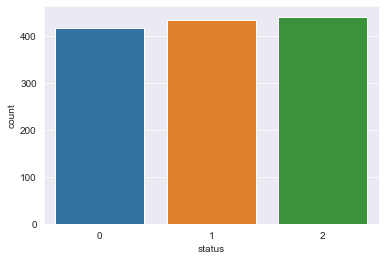

In [9]:
sns.set_style('darkgrid')
sns.countplot(x='status', data=fig_df)

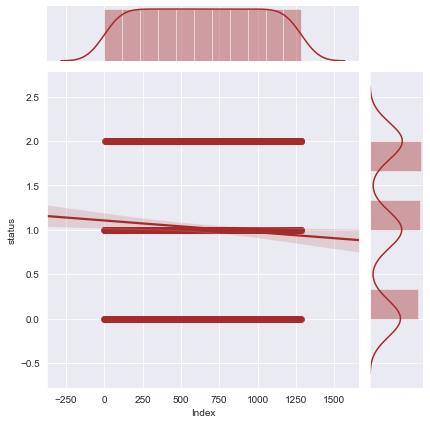

In [10]:
sns.jointplot(x='Index', y='status', data=train_df, kind='reg', color='Brown');

In [11]:
from plotly import __version__
import cufflinks as cf

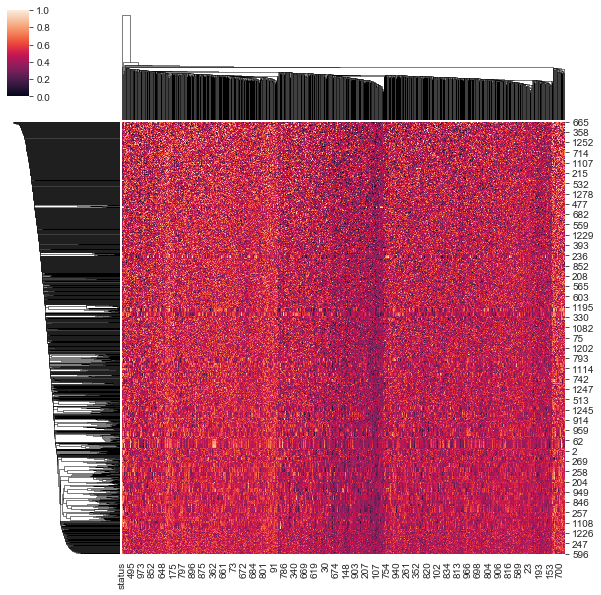

In [12]:
sns.clustermap(fig_df, standard_scale=1);

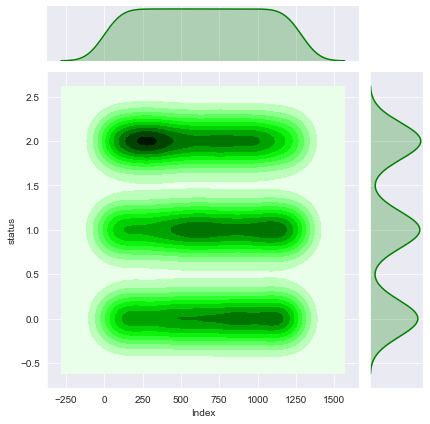

In [13]:
sns.jointplot(x='Index', y='status', data=train_df, kind='kde', color='green');

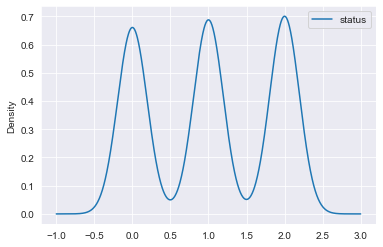

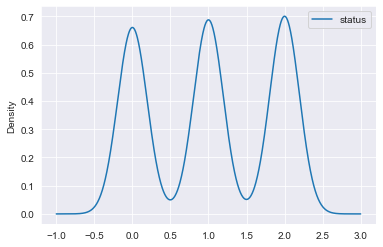

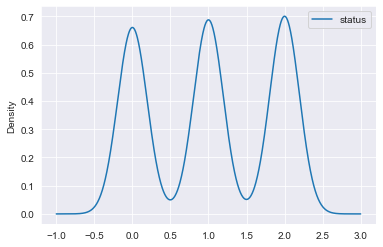

In [14]:
for i in range(3):
    train_df.plot(kind='kde', x=i, y='status')

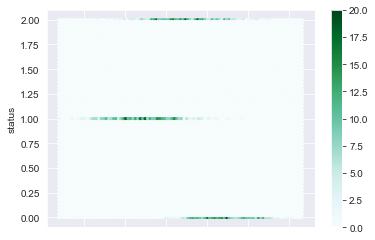

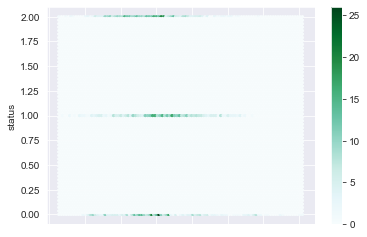

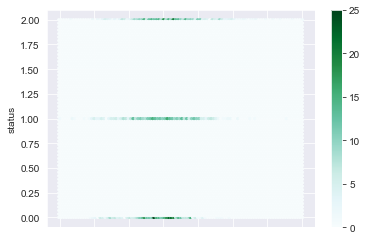

In [15]:
for i in range(3,6):
    train_df.plot(kind='hexbin', x=i, y='status', colorbar=True)

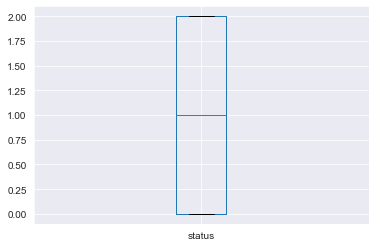

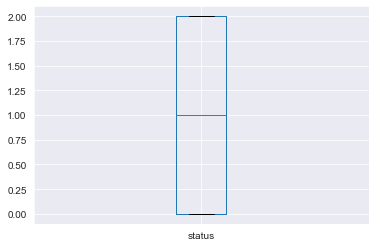

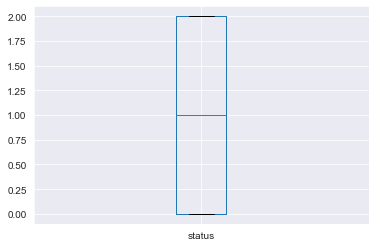

In [16]:
for i in range(6,9):
    train_df.plot(kind='box', x=i, y='status')

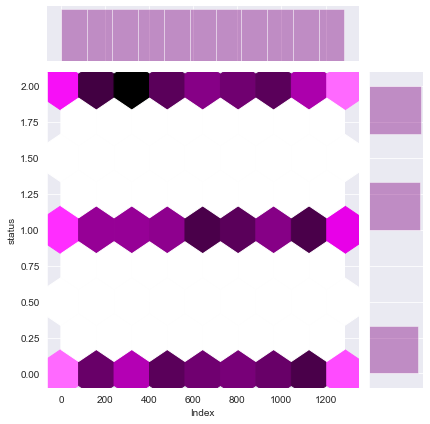

In [17]:
sns.jointplot(x='Index', y='status', data=train_df, kind='hex',color='purple');

## Normalizer

In [18]:
from sklearn.preprocessing import Normalizer
scalar = Normalizer()
scalar.fit(X_train);

In [19]:
normalized = scalar.transform(X_train)
normalized1 = scalar.transform(X_test)

In [20]:
normalized_xtrain = pd.DataFrame(normalized)
normalized_xtest = pd.DataFrame(normalized1)

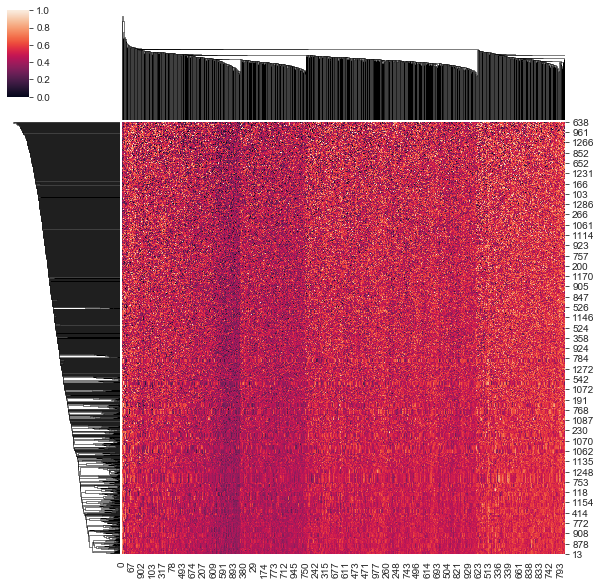

In [21]:
sns.clustermap(normalized_xtrain, standard_scale=1);

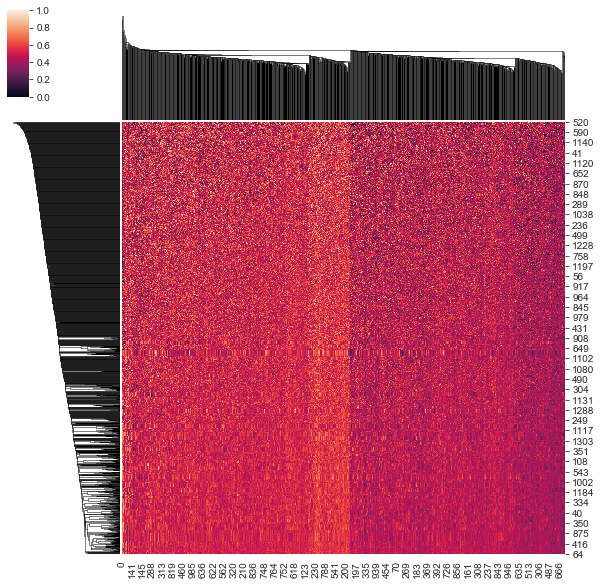

In [22]:
sns.clustermap(normalized_xtest, standard_scale=1);

## StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train);

In [24]:
scaled_data = scaler.transform(X_train)
scaled_data1 = scaler.transform(X_test)

In [25]:
scaled_xtrain = pd.DataFrame(scaled_data)
scaled_xtest = pd.DataFrame(scaled_data1)

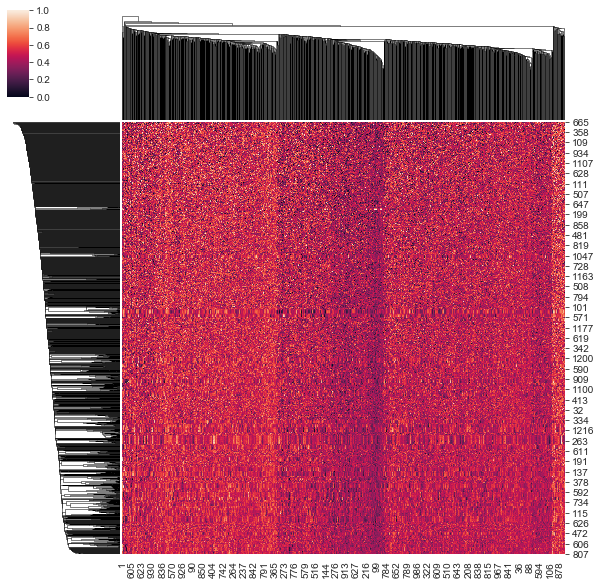

In [26]:
sns.clustermap(scaled_xtrain, standard_scale=1);

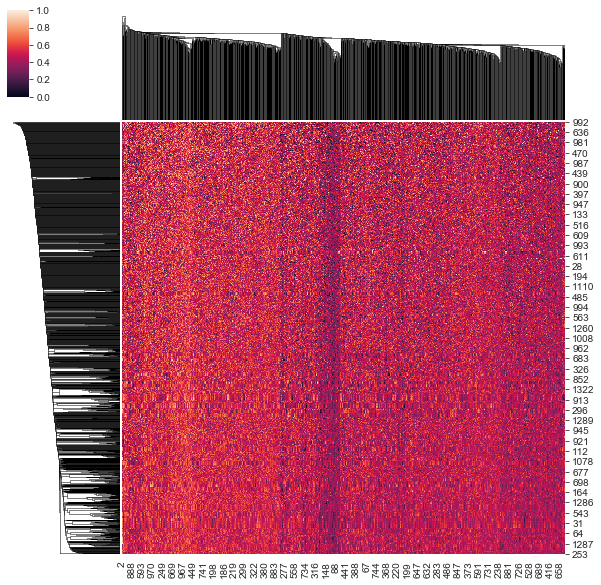

In [27]:
sns.clustermap(scaled_xtest, standard_scale=1);

## PCA For Standard Scaler

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=298)
pca.fit(scaled_xtrain)
pca.fit(scaled_xtest);

In [29]:
x_trainpca = pca.transform(scaled_xtrain)

In [30]:
x_testpca = pca.transform(scaled_xtest)

## PCA For Normalizer

In [97]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=500)
pca1.fit(normalized_xtrain)
pca1.fit(normalized_xtest);

In [98]:
x_trainpca1 = pca.transform(normalized_xtrain)

In [99]:
x_testpca1 = pca.transform(normalized_xtest)

## SVC to PCA data

In [115]:
from sklearn import svm
clf1 = svm.SVC(kernel='poly', degree=13, gamma=8, C=1)
clf1.fit(x_trainpca1,Y_train)
y_pred1=clf1.predict(x_testpca1)

In [116]:
Result1 = pd.DataFrame(y_pred1, columns=['Status'])
Result1.insert(0, 'Index', test_df['Index'])

In [117]:
Result1.to_csv('PracticeResults131.csv', index=False)

## Hypertuning KNN and RandomForestClassifier

In [94]:
X1_val = x_trainpca1[0:200]
Y1_val=Y_train[0:200]
X1_train=x_trainpca1[200:]
Y1_train=Y_train[200:]

In [70]:
accuracy=[]

In [71]:
for i in range(1,100):
    from sklearn.neighbors import KNeighborsClassifier
    knn1=KNeighborsClassifier(n_neighbors=i, leaf_size=100, algorithm='auto')
    knn1.fit(X1_train,Y1_train)
    pred1=knn1.predict(X1_val)
    from sklearn.metrics import accuracy_score
    accuracy.append(accuracy_score(Y1_val,pred1))

In [72]:
print(accuracy)

[0.8983333333333333, 0.8883333333333333, 0.91, 0.915, 0.915, 0.9166666666666666, 0.9083333333333333, 0.9183333333333333, 0.915, 0.9216666666666666, 0.9083333333333333, 0.9183333333333333, 0.9116666666666666, 0.9116666666666666, 0.9066666666666666, 0.91, 0.8983333333333333, 0.905, 0.8983333333333333, 0.9, 0.9016666666666666, 0.8966666666666666, 0.9, 0.8916666666666667, 0.8916666666666667, 0.8933333333333333, 0.895, 0.8916666666666667, 0.8916666666666667, 0.8816666666666667, 0.8866666666666667, 0.8816666666666667, 0.885, 0.8866666666666667, 0.8866666666666667, 0.8866666666666667, 0.8883333333333333, 0.8866666666666667, 0.8866666666666667, 0.8866666666666667, 0.8866666666666667, 0.8883333333333333, 0.8883333333333333, 0.8816666666666667, 0.88, 0.88, 0.8783333333333333, 0.88, 0.885, 0.88, 0.88, 0.8766666666666667, 0.8816666666666667, 0.8783333333333333, 0.88, 0.8716666666666667, 0.8716666666666667, 0.8666666666666667, 0.87, 0.8733333333333333, 0.8683333333333333, 0.865, 0.87, 0.86833333333

In [73]:
accuracy1=[]
for i in range(1,100):
    from sklearn.ensemble import RandomForestClassifier
    knn2=RandomForestClassifier(n_estimators=i)
    knn2.fit(X1_train,Y1_train)
    pred2=knn2.predict(X1_val)
    from sklearn.metrics import accuracy_score
    accuracy1.append(accuracy_score(Y1_val,pred2))

In [74]:
print(accuracy1)

[0.7333333333333333, 0.7183333333333334, 0.7966666666666666, 0.7783333333333333, 0.7916666666666666, 0.8116666666666666, 0.8433333333333334, 0.8083333333333333, 0.8383333333333334, 0.845, 0.8583333333333333, 0.87, 0.8616666666666667, 0.87, 0.845, 0.865, 0.8866666666666667, 0.8633333333333333, 0.8666666666666667, 0.8733333333333333, 0.8766666666666667, 0.885, 0.8766666666666667, 0.88, 0.8966666666666666, 0.8916666666666667, 0.8866666666666667, 0.88, 0.8816666666666667, 0.8783333333333333, 0.89, 0.8933333333333333, 0.895, 0.8866666666666667, 0.9033333333333333, 0.8833333333333333, 0.895, 0.8966666666666666, 0.905, 0.9033333333333333, 0.91, 0.9083333333333333, 0.895, 0.89, 0.8966666666666666, 0.8966666666666666, 0.8883333333333333, 0.9066666666666666, 0.9033333333333333, 0.9, 0.9066666666666666, 0.8983333333333333, 0.9083333333333333, 0.9066666666666666, 0.915, 0.91, 0.9016666666666666, 0.905, 0.905, 0.9083333333333333, 0.9066666666666666, 0.905, 0.9033333333333333, 0.8983333333333333, 0.

In [95]:
accuracy2=[]
for i in range(1,20):
    from sklearn import svm
    clf2 = svm.SVC(kernel='poly', degree=i, gamma=4, C=3)
    clf2.fit(X1_train,Y1_train)
    y_pred2=clf2.predict(X1_val)
    from sklearn.metrics import accuracy_score
    accuracy2.append(accuracy_score(Y1_val,y_pred2))

In [96]:
print(accuracy2)

[0.93, 0.955, 0.955, 0.955, 0.95, 0.95, 0.955, 0.955, 0.955, 0.955, 0.955, 0.955, 0.955, 0.95, 0.95, 0.945, 0.95, 0.945, 0.935]
